<a href="https://colab.research.google.com/github/karthisha-13/GENERATIVE-AI_2025/blob/main/2303A52099_Week_6_Assignment_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**QUESTION-1**

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - loss: 9435476918272.0000 - mse: 9435476918272.0000 - val_loss: 5116090384384.0000 - val_mse: 5116090384384.0000
Epoch 2/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 3360886358016.0000 - mse: 3360886358016.0000 - val_loss: 5177251725312.0000 - val_mse: 5177251201024.0000
Epoch 3/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 3062704635904.0000 - mse: 3062704635904.0000 - val_loss: 5074138431488.0000 - val_mse: 5074138431488.0000
Epoch 4/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 3269697470464.0000 - mse: 3269697470464.0000 - val_loss: 5068768149504.0000 - val_mse: 5068768149504.0000
Epoch 5/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 3322752270336.0000 - mse: 3322752270336.0000 - val_loss: 5402183335936.0000 - val_mse: 5402183335936.0000
Epoch 6/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 3435279941632.0000 - mse: 3435279941632.0000 - val_loss: 5089182351360.0000 - val_mse: 5089182351360.0000
Epoc

Training MSE: 3109700763648.0, Testing MSE: 5269131624448.0


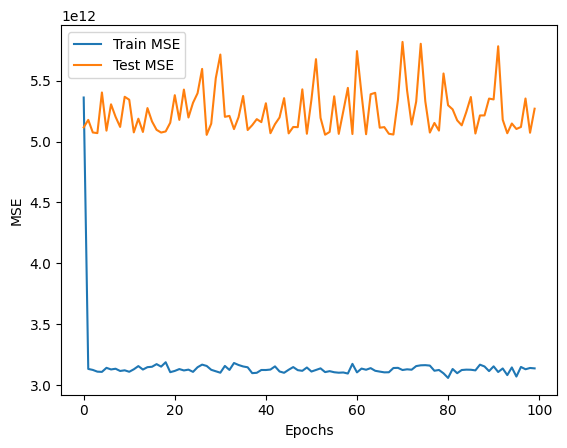

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

url = 'https://drive.google.com/uc?id=1AcdENlVm5dccNyo_vgdMbneX8YVvH5R3'
df = pd.read_csv(url)

print(df.columns)
df.columns = df.columns.str.strip()

if 'Price' in df.columns:
    target_column = 'Price'
elif 'price' in df.columns:
    target_column = 'price'
else:
    raise KeyError("Target column not found. Check dataset column names.")

X = df.drop(columns=[target_column])
y = df[target_column]

categorical_columns = X.select_dtypes(include=['object']).columns

X = pd.get_dummies(X, columns=categorical_columns, drop_first=True)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build ANN model
model = Sequential([
    Dense(15, activation='tanh', input_shape=(X_train.shape[1],)),
    Dense(20, activation='tanh'),
    Dense(15, activation='tanh'),
    Dense(1, activation='linear')  # Regression output
])

# Compile model
model.compile(optimizer=keras.optimizers.SGD(), loss='mse', metrics=['mse'])

# Train model
history = model.fit(X_train, y_train, epochs=100, batch_size=16, validation_data=(X_test, y_test))

# Evaluate model
train_mse = model.evaluate(X_train, y_train, verbose=0)[1]
test_mse = model.evaluate(X_test, y_test, verbose=0)[1]
print(f'Training MSE: {train_mse}, Testing MSE: {test_mse}')

# Save model
model.save('housing_price_model.h5')

# Plot training history
plt.plot(history.history['mse'], label='Train MSE')
plt.plot(history.history['val_mse'], label='Test MSE')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.legend()
plt.show()

# Load and use model
def predict_price(features):
    loaded_model = keras.models.load_model('housing_price_model.h5')
    features = scaler.transform([features])  # Scale input
    return loaded_model.predict(features)[0][0]

# Example usage
# sample_features = X_test[0]  # Replace with actual sample
# print(predict_price(sample_features))

**QUESTION-2**

Epoch 1/150
14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 25936359587840.0000 - mae: 4772334.0000 - val_loss: 30129992499200.0000 - val_mae: 5007536.5000
Epoch 2/150
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 25938450448384.0000 - mae: 4798011.5000 - val_loss: 30129988304896.0000 - val_mae: 5007536.0000
Epoch 3/150
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 24687702704128.0000 - mae: 4673554.5000 - val_loss: 30129982013440.0000 - val_mae: 5007535.5000
Epoch 4/150
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 25743390146560.0000 - mae: 4741243.0000 - val_loss: 30129958944768.0000 - val_mae: 5007534.0000
Epoch 5/150
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 24569727418368.0000 - mae: 4660070.0000 - val_loss: 30129910710272.0000 - val_mae: 5007529.0000
Epoch 6/150
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 25302648487936.0000 - mae: 4735628.0000 - val_loss: 30129776492544.0000 - val_mae: 5007516.0000
Epoch 7/150
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 25663052

Training MAE: 718963.75, Testing MAE: 1094958.5


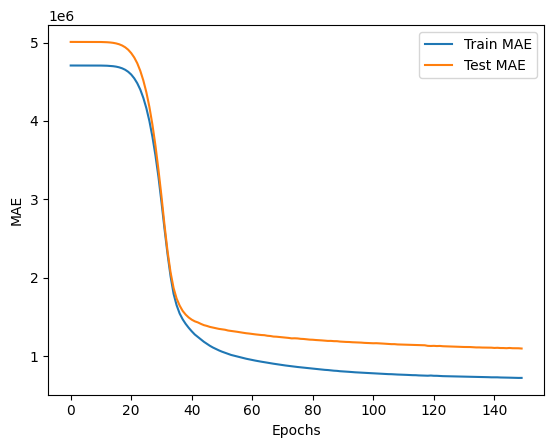

In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

url = 'https://drive.google.com/uc?id=1AcdENlVm5dccNyo_vgdMbneX8YVvH5R3'
df = pd.read_csv(url)

df.columns = df.columns.str.strip()

target_column = 'Price' if 'Price' in df.columns else 'price' if 'price' in df.columns else None
if target_column is None:
    raise KeyError("Target column not found. Check dataset column names.")

X = df.drop(columns=[target_column])
y = df[target_column]

categorical_columns = X.select_dtypes(include=['object']).columns
X = pd.get_dummies(X, columns=categorical_columns, drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(15, activation='relu'),
    Dense(20, activation='relu'),
    Dense(25, activation='relu'),
    Dense(20, activation='relu'),
    Dense(15, activation='relu'),
    Dense(1, activation='linear')
])

model.compile(optimizer=keras.optimizers.Adam(), loss='mse', metrics=['mae'])

history = model.fit(X_train, y_train, epochs=150, batch_size=32, validation_data=(X_test, y_test))

train_mae = model.evaluate(X_train, y_train, verbose=0)[1]
test_mae = model.evaluate(X_test, y_test, verbose=0)[1]
print(f'Training MAE: {train_mae}, Testing MAE: {test_mae}')

model.save('housing_price_model.h5')

plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend(['Train MAE', 'Test MAE'])
plt.show()

def predict_price(features):
    loaded_model = keras.models.load_model('housing_price_model.h5')
    features = scaler.transform([features])
    return loaded_model.predict(features)[0][0]

**QUESTION-3**

Epoch 1/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 57ms/step - loss: 25329066311680.0000 - root_mean_squared_error: 5032174.0000 - val_loss: 30129992499200.0000 - val_root_mean_squared_error: 5489079.5000
Epoch 2/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 24333065912320.0000 - root_mean_squared_error: 4931787.5000 - val_loss: 30129990402048.0000 - val_root_mean_squared_error: 5489079.0000
Epoch 3/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 25486430306304.0000 - root_mean_squared_error: 5048126.0000 - val_loss: 30129988304896.0000 - val_root_mean_squared_error: 5489079.0000
Epoch 4/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 26087591510016.0000 - root_mean_squared_error: 5105513.5000 - val_loss: 30129984110592.0000 - val_root_mean_squared_error: 5489078.5000
Epoch 5/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 25166297956352.0000 - root_mean_squared_error: 5016462.0000 - val_loss: 30129977819136.0000 - val_root_mean_squared_error: 5489078.0000
Epoch 6/200
7/7 ━━━━━━━━━━━━━━

Training RMSE: 4416503.5, Testing RMSE: 4818752.0


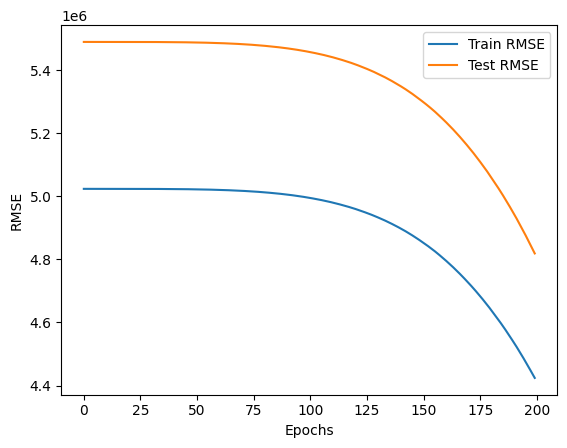

In [3]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

url = 'https://drive.google.com/uc?id=1AcdENlVm5dccNyo_vgdMbneX8YVvH5R3'
df = pd.read_csv(url)

df.columns = df.columns.str.strip()

target_column = 'Price' if 'Price' in df.columns else 'price' if 'price' in df.columns else None
if target_column is None:
    raise KeyError("Target column not found. Check dataset column names.")

X = df.drop(columns=[target_column])
y = df[target_column]

categorical_columns = X.select_dtypes(include=['object']).columns
X = pd.get_dummies(X, columns=categorical_columns, drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(18, activation='swish'),
    Dense(26, activation='swish'),
    Dense(20, activation='swish'),
    Dense(15, activation='swish'),
    Dense(1, activation='linear')
])

model.compile(optimizer=keras.optimizers.RMSprop(), loss='mse', metrics=[tf.keras.metrics.RootMeanSquaredError()])

history = model.fit(X_train, y_train, epochs=200, batch_size=64, validation_data=(X_test, y_test))

train_rmse = model.evaluate(X_train, y_train, verbose=0)[1]
test_rmse = model.evaluate(X_test, y_test, verbose=0)[1]
print(f'Training RMSE: {train_rmse}, Testing RMSE: {test_rmse}')

model.save('housing_price_model.h5')

plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.xlabel('Epochs')
plt.ylabel('RMSE')
plt.legend(['Train RMSE', 'Test RMSE'])
plt.show()

def predict_price(features):
    loaded_model = keras.models.load_model('housing_price_model.h5')
    features = scaler.transform([features])
    return loaded_model.predict(features)[0][0]
